# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [1]:
import json

In [2]:
with open("recipes.json") as f:
    recipes = json.load(f)

In [3]:
print(recipes[0])

{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}


### Составление корпуса

In [7]:
from gensim import corpora, models
import numpy as np

Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [8]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [10]:
print(texts[0])
print(corpus[:4])

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)], [(5, 1), (9, 1), (15, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)], [(15, 1), (18, 1), (29, 1), (30, 1)]]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [13]:
np.random.seed(76543)
# здесь код для построения модели:
lda = models.LdaModel(corpus, num_topics=40, passes=5)

In [18]:
top = lda.show_topics(num_topics=40, num_words=10, formatted=False)

In [36]:
d = {}
for i in ["salt", "sugar", "water", "mushrooms", "chicken", "eggs"]:
    d[i] = [dictionary.token2id[i], 0]

In [37]:
for i in d.values():
    for doc in top:
            for word in doc[1]:
                if word[0] == str(i[0]):
                    i[1] += 1                

In [38]:
d.values()

dict_values([[15, 23], [52, 9], [29, 8], [82, 1], [729, 0], [9, 2]])

In [40]:
save_answers1(23, 9, 8, 1, 0, 2)

In [39]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("otvet1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [41]:
import copy
dictionary2 = copy.deepcopy(dictionary)

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [45]:
chast = []
for i in dictionary2.dfs.keys():
    if dictionary2.dfs[i] > 4000:
        chast.append(i)

In [47]:
dictionary2.filter_tokens(chast)

In [53]:
corpus2 = [dictionary2.doc2bow(text) for text in texts]

In [60]:
s1 = sum([len(i) for i in corpus])
s2 = sum([len(i) for i in corpus2])    

In [67]:
save_answers2(len(dictionary), len(dictionary2), s1, s2)

In [66]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("otvet2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [68]:
np.random.seed(76543)
# здесь код для построения модели:
lda2 = models.LdaModel(corpus2, num_topics=40, passes=5)

In [75]:
cog = lda.top_topics(corpus=corpus, dictionary=dictionary)
cog2 = lda2.top_topics(corpus=corpus2, dictionary=dictionary2)

In [84]:
np.mean([i[1] for i in cog])

-6.290560728421211

In [86]:
save_answers3(np.mean([i[1] for i in cog]), np.mean([i[1] for i in cog2]))

In [85]:
def save_answers3(coherence, coherence2):
    with open("otvet3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [96]:
lda2.get_document_topics(corpus2)[0]

[(25, 0.12812187), (31, 0.6175879), (33, 0.138662)]

Также выведите содержимое переменной *.alpha* второй модели:

In [92]:
lda2.alpha

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025], dtype=float32)

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [97]:
np.random.seed(76543)
# здесь код для построения модели:
lda3 = models.LdaModel(corpus2, num_topics=40, passes=5, alpha=1)

In [98]:
lda3.get_document_topics(corpus2)[0]

[(0, 0.02139767),
 (1, 0.021295449),
 (2, 0.021276837),
 (3, 0.021365918),
 (4, 0.021295369),
 (5, 0.021311188),
 (6, 0.02130497),
 (7, 0.021280425),
 (8, 0.02140141),
 (9, 0.021379549),
 (10, 0.021837927),
 (11, 0.02149252),
 (12, 0.021276837),
 (13, 0.02218951),
 (14, 0.021718133),
 (15, 0.021506282),
 (16, 0.021404231),
 (17, 0.021964444),
 (18, 0.021329323),
 (19, 0.021678474),
 (20, 0.024654336),
 (21, 0.021277266),
 (22, 0.021276837),
 (23, 0.02128486),
 (24, 0.021771807),
 (25, 0.021494577),
 (26, 0.021462504),
 (27, 0.021634083),
 (28, 0.0214952),
 (29, 0.02130315),
 (30, 0.042615026),
 (31, 0.092192926),
 (32, 0.021500388),
 (33, 0.021278715),
 (34, 0.021446656),
 (35, 0.021365918),
 (36, 0.021331841),
 (37, 0.021289436),
 (38, 0.021277951),
 (39, 0.06834008)]

In [112]:
s1 = sum([len(i) for i in lda2.get_document_topics(corpus2, minimum_probability=0.01)])
s2 = sum([len(i) for i in lda3.get_document_topics(corpus2, minimum_probability=0.01)])

In [115]:
save_answers4(s1, s2)

In [99]:
def save_answers4(count_model2, count_model3):
    with open("otvet4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [164]:
data = pandas.DataFrame(np.zeros((len(recipes), 40)))

In [173]:
for i, doc in enumerate(lda2.get_document_topics(corpus2)):
    for tem in doc:
        data[tem[0]][i] = tem[1]

In [182]:
data['target'] = [i['cuisine'] for i in recipes]
le = LabelEncoder()
le.fit(data.target)
data.target = le.transform(data.target)

In [190]:
data

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,target
0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.617580,0.000000,0.13867,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,6
1,0.000000,0.000000,0.00000,0.113888,0.326322,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000000,0.000000,0.00000,0.0000,0.0000,0.000000,0.0000,0.000000,0.224999,16
2,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000000,0.000000,0.00000,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,4
3,0.012500,0.012500,0.01250,0.012500,0.012500,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.012500,0.012500,0.01250,0.0125,0.0125,0.012500,0.0125,0.012500,0.012500,7
4,0.000000,0.125094,0.00000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000000,0.065678,0.00000,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,0.000000,0.000000,0.10251,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000000,0.000000,0.00000,0.0000,0.0000,0.102517,0.0000,0.102517,0.102362,8
39770,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000000,0.146398,0.00000,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,9
39771,0.000000,0.000000,0.00000,0.166385,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000000,0.000000,0.00000,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,8
39772,0.054456,0.000000,0.00000,0.053917,0.110990,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000000,0.000000,0.00000,0.0000,0.0000,0.056162,0.0000,0.056238,0.000000,3


In [191]:
rf = RandomForestClassifier(n_estimators=100)
res = cross_val_score(rf, data.drop('target', axis=1), y=data.target, cv=3)

In [196]:
save_answers5(res.mean())

In [194]:
def save_answers5(accuracy):
     with open("otvet5.txt", "w") as fout:
        fout.write(str(accuracy))

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [122]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print(w)

In [140]:
generate_recipe(lda2, 10)

ValueError: probabilities do not sum to 1

### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [142]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [143]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [149]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

In [153]:
compute_topic_cuisine_matrix(lda3, corpus2, recipes)

,korean,irish,mexican,japanese,cajun_creole,brazilian,southern_us,french,spanish,vietnamese,italian,jamaican,chinese,british,thai,filipino,russian,indian,moroccan,greek
0,0.024601,0.023043,0.024609,0.023854,0.023460,0.024249,0.023695,0.024717,0.024759,0.025194,0.023668,0.023854,0.024426,0.023590,0.024368,0.024105,0.023464,0.023389,0.023740,0.023088
1,0.022216,0.027178,0.023376,0.022446,0.022983,0.023843,0.027162,0.025449,0.024045,0.021182,0.023954,0.031722,0.021828,0.028479,0.021311,0.023466,0.026055,0.023296,0.030238,0.024947
2,0.022821,0.023553,0.023270,0.030025,0.021478,0.024650,0.022522,0.023028,0.023847,0.028077,0.022206,0.025756,0.024245,0.023599,0.026733,0.024803,0.023485,0.081872,0.035057,0.023861
3,0.022933,0.023940,0.026207,0.022677,0.023579,0.025350,0.024148,0.023716,0.024320,0.022360,0.024276,0.024569,0.022845,0.024160,0.021672,0.024519,0.023221,0.022115,0.023051,0.023564
4,0.022253,0.023498,0.026150,0.022358,0.026005,0.022817,0.025818,0.022541,0.022491,0.021341,0.028951,0.025804,0.022161,0.023751,0.021026,0.024472,0.023352,0.021682,0.021485,0.024039
5,0.023791,0.030496,0.023268,0.024887,0.023956,0.028569,0.030760,0.026756,0.025432,0.022838,0.025275,0.024932,0.024254,0.035180,0.022232,0.029008,0.030781,0.022727,0.022299,0.027946
6,0.021667,0.026517,0.023054,0.022811,0.025005,0.029439,0.031581,0.028961,0.027889,0.021943,0.025137,0.024817,0.022211,0.028790,0.021684,0.023401,0.027578,0.021801,0.023525,0.024392
7,0.021492,0.024453,0.022543,0.022026,0.022938,0.023712,0.024053,0.024703,0.023076,0.021590,0.034317,0.022427,0.021338,0.023287,0.022072,0.023187,0.022993,0.020961,0.022040,0.025265
8,0.022878,0.023130,0.029855,0.023081,0.025235,0.024799,0.024176,0.022867,0.023729,0.023498,0.023623,0.024248,0.023669,0.023383,0.023335,0.025752,0.023684,0.024848,0.023436,0.024641
9,0.028265,0.024711,0.022683,0.024000,0.022539,0.024605,0.025639,0.024964,0.023746,0.023611,0.023732,0.024902,0.023930,0.026503,0.023415,0.023733,0.027430,0.024123,0.028490,0.024491


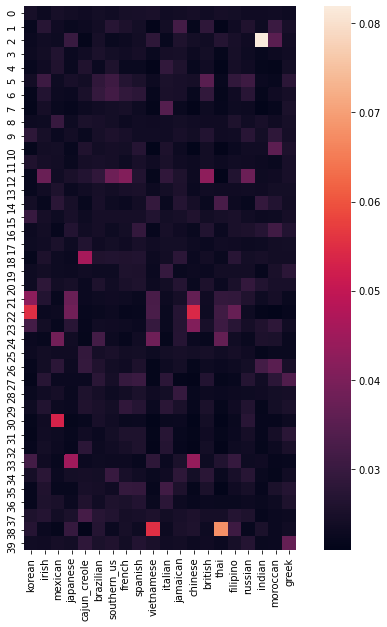

In [152]:
plot_matrix(compute_topic_cuisine_matrix(lda3, corpus2, recipes))

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 